C:\ProgramData\anaconda3\Lib\site-packages\skimage\exposure\exposure.py:350: RuntimeWarning: invalid value encountered in divide
  img_cdf = img_cdf / float(img_cdf[-1])


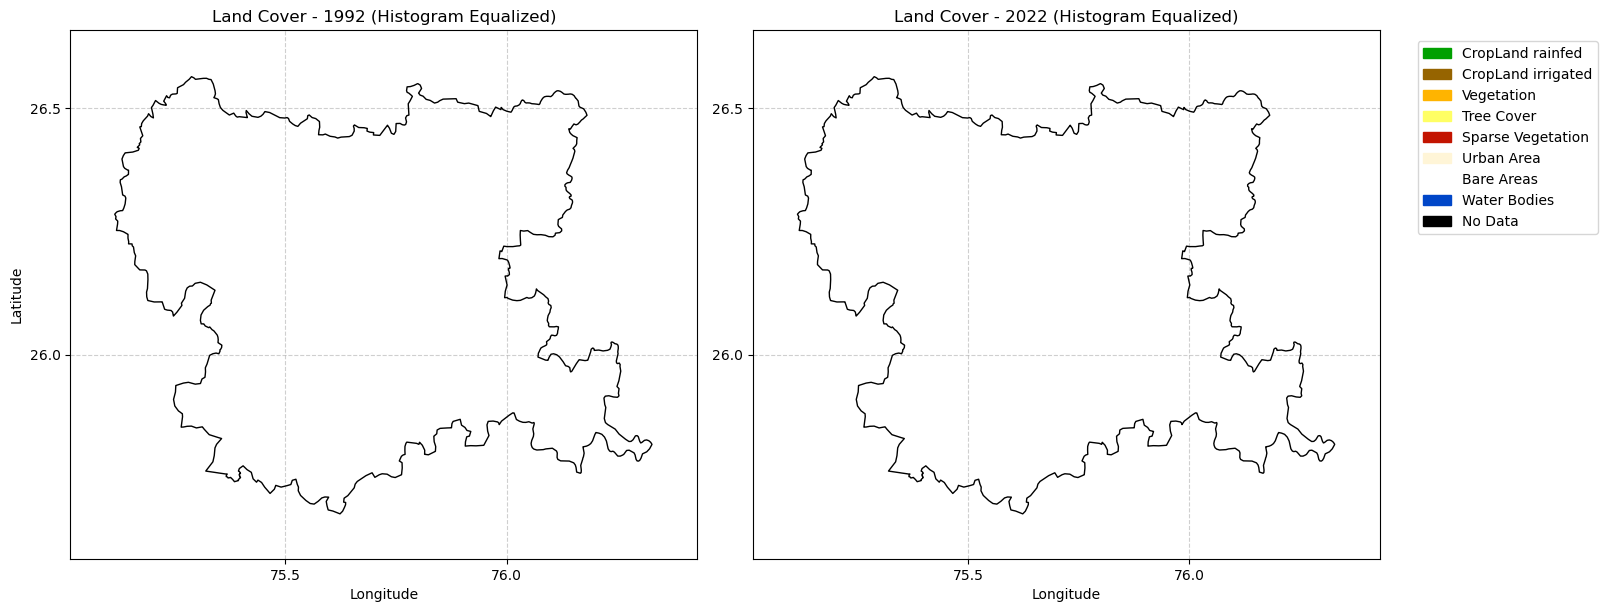

In [2]:
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
from skimage import exposure  # Import for histogram equalization

# Load shapefile and extract outer boundaries
shapefile_path = "C:/Users/saurabh/Downloads/tONK/Export_Output_3.shp"  # Update path
gdf = gpd.read_file(shapefile_path)
gdf["geometry"] = gdf["geometry"].apply(lambda geom: geom.exterior if geom.geom_type == "Polygon" else None)
gdf = gdf.dropna(subset=["geometry"])

# Load raster file
raster_path = "C:/Users/saurabh/trends_earth_data/datasets/a3aa9518-f745-4ae5-b553-4861c90af299/none_download-data_shape-lon75.721lat26.121-buffer-10.000_Int16.tif"
with rasterio.open(raster_path) as src:
    band_1992 = src.read(1).astype(np.float32)  # Convert to float for equalization
    band_2022 = src.read(31).astype(np.float32)
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

# Define ESA CCI Land Cover Classes
land_cover_classes = {
    10: "CropLand rainfed",
    20: "CropLand irrigated",
    30: "Vegetation",
    80: "Tree Cover",
    150: "Sparse Vegetation",
    190: "Urban Area",
    200: "Bare Areas",
    210: "Water Bodies",
}
no_data_value = -32768

# Reclassify raster (Keep only valid classes, set others as No Data)
band_1992_cleaned = np.where(np.isin(band_1992, land_cover_classes.keys()), band_1992, no_data_value)
band_2022_cleaned = np.where(np.isin(band_2022, land_cover_classes.keys()), band_2022, no_data_value)

# Apply Histogram Equalization (Normalize before applying)
band_1992_eq = exposure.equalize_hist(band_1992_cleaned, mask=band_1992_cleaned > no_data_value)
band_2022_eq = exposure.equalize_hist(band_2022_cleaned, mask=band_2022_cleaned > no_data_value)

# Define colors for classes (RGB values converted to 0-1 range)
land_cover_colors = {
    no_data_value: (0, 0, 0),  # No Data - Black
    10: (0, 160, 0),  # Trees - Green
    20: (150, 100, 0),  # Shrubs - Brown
    30: (255, 180, 0),  # Grassland - Yellow-Orange
    80: (255, 255, 100),  # Cropland - Light Yellow
    150: (195, 20, 0),  # Built-up - Red
    190: (255, 245, 215),  # Bare Areas - Sandy Brown
    200: (255, 255, 255),  # Snow/Ice - White
    210: (0, 70, 200),  # Water - Blue
}

# Convert colors to colormap
cmap_final = ListedColormap([np.array(land_cover_colors[key]) / 255.0 for key in land_cover_classes.keys()] +
                            [np.array(land_cover_colors[no_data_value]) / 255.0])

# Plot 1992 & 2022 Equalized Land Cover Maps with Shapefile Overlay
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1992 Equalized Map
axes[0].imshow(band_1992_eq, cmap=cmap_final, extent=extent, origin="upper")
axes[0].set_title("Land Cover - 1992 (Histogram Equalized)")
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")

# 2022 Equalized Map
axes[1].imshow(band_2022_eq, cmap=cmap_final, extent=extent, origin="upper")
axes[1].set_title("Land Cover - 2022 (Histogram Equalized)")
axes[1].set_xlabel("Longitude")

# Overlay extracted polygon boundaries
gdf.plot(ax=axes[0], facecolor="none", edgecolor="black", linewidth=1)
gdf.plot(ax=axes[1], facecolor="none", edgecolor="black", linewidth=1)

# Create legend patches
legend_patches = [mpatches.Patch(color=np.array(land_cover_colors[key]) / 255.0, label=label)
                   for key, label in land_cover_classes.items()]
legend_patches.append(mpatches.Patch(color=np.array(land_cover_colors[no_data_value]) / 255.0, label="No Data"))

# Add legend
fig.legend(handles=legend_patches, loc="upper right", bbox_to_anchor=(1.15, 0.95))

# Add gridlines
for ax in axes:
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
    ax.xaxis.set_major_formatter(plt.FormatStrFormatter("%.1f"))
    ax.yaxis.set_major_formatter(plt.FormatStrFormatter("%.1f"))
    ax.grid(visible=True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


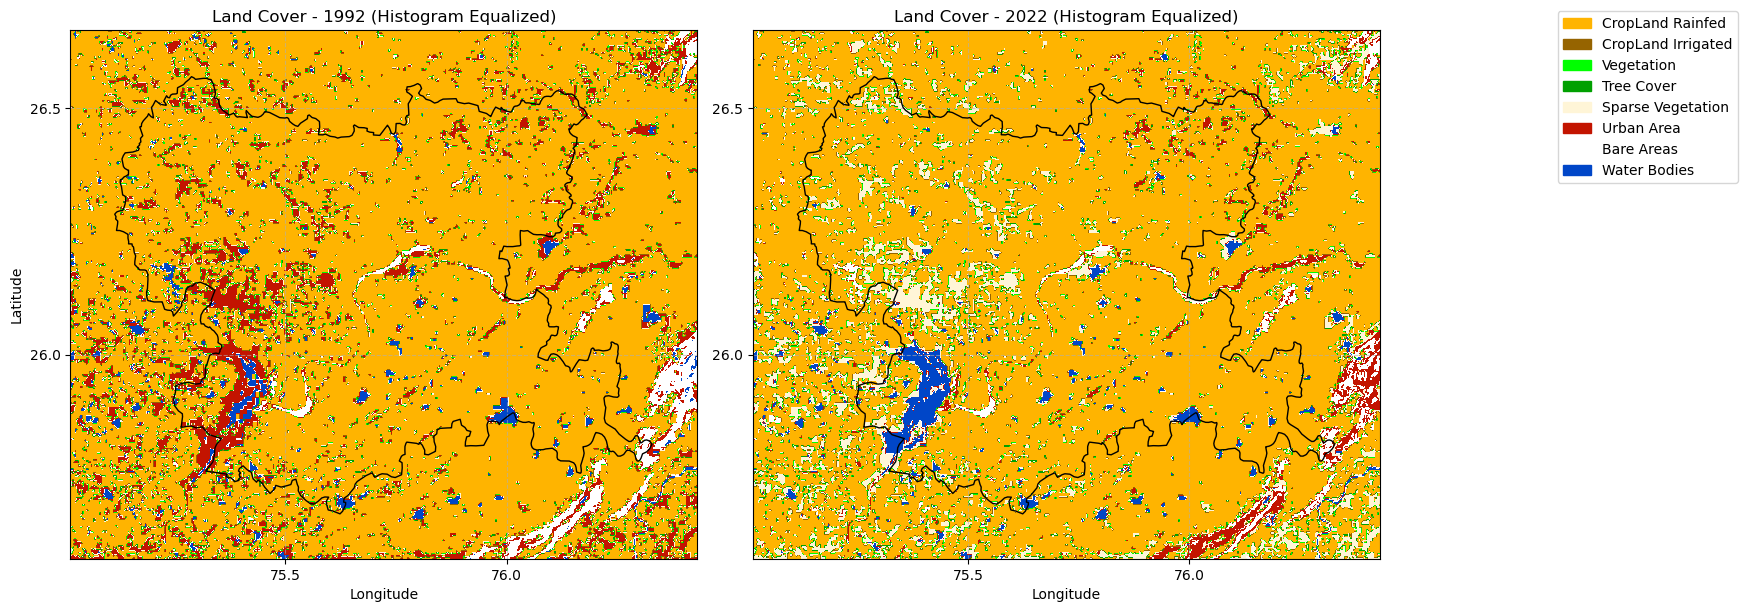

In [6]:
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
from skimage import exposure

# Load shapefile and extract only outer boundaries
shapefile_path = "C:/Users/saurabh/Downloads/tONK/Export_Output_3.shp"  # Update path
gdf = gpd.read_file(shapefile_path)
gdf["geometry"] = gdf["geometry"].apply(lambda geom: geom.exterior if geom.geom_type == "Polygon" else None)
gdf = gdf.dropna(subset=["geometry"])

# Load raster file
raster_path = "C:/Users/saurabh/trends_earth_data/datasets/a3aa9518-f745-4ae5-b553-4861c90af299/none_download-data_shape-lon75.721lat26.121-buffer-10.000_Int16.tif"
with rasterio.open(raster_path) as src:
    band_1992 = src.read(1).astype(np.float32)  # Convert to float for equalization
    band_2022 = src.read(31).astype(np.float32)
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

# Define ESA CCI Land Cover Classes & Colors
land_cover_classes = {
    10: "CropLand Rainfed",
    20: "CropLand Irrigated",
    30: "Vegetation",
    80: "Tree Cover",
    150: "Sparse Vegetation",
    190: "Urban Area",
    200: "Bare Areas",
    210: "Water Bodies",
}
land_cover_colors = {
    10: (255, 180, 0),  # CropLand Rainfed - Dark Green
    20: (150, 100, 0),  # CropLand Irrigated - Brown
    30: (0, 255, 0),  # Vegetation - Yellow-Orange
    80: (0, 160, 0),  # Tree Cover - Bright Green
    150: (255, 245, 215),  # Sparse Vegetation - Red
    190: (195, 20, 0),  # Urban Area - Sandy Brown
    200: (255, 255, 255),  # Bare Areas - White
    210: (0, 70, 200),  # Water Bodies - Blue
}
no_data_value = -32768  # No Data Value

# Mask No Data Values
band_1992[band_1992 == no_data_value] = np.nan
band_2022[band_2022 == no_data_value] = np.nan

# Apply Histogram Equalization (Only to valid land cover pixels)
band_1992_eq = exposure.equalize_hist(band_1992, mask=~np.isnan(band_1992))
band_2022_eq = exposure.equalize_hist(band_2022, mask=~np.isnan(band_2022))

# Convert RGB Dictionary to Colormap
cmap_final = ListedColormap([np.array(land_cover_colors[key]) / 255.0 for key in land_cover_classes.keys()])

# Plot Equalized Land Cover Maps
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1992 Equalized Map
im1 = axes[0].imshow(band_1992_eq, cmap=cmap_final, extent=extent, origin="upper")
axes[0].set_title("Land Cover - 1992 (Histogram Equalized)")
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")

# 2022 Equalized Map
im2 = axes[1].imshow(band_2022_eq, cmap=cmap_final, extent=extent, origin="upper")
axes[1].set_title("Land Cover - 2022 (Histogram Equalized)")
axes[1].set_xlabel("Longitude")

# Overlay extracted polygon boundaries
gdf.plot(ax=axes[0], facecolor="none", edgecolor="black", linewidth=1)
gdf.plot(ax=axes[1], facecolor="none", edgecolor="black", linewidth=1)

# Create a legend
legend_patches = [mpatches.Patch(color=np.array(land_cover_colors[key]) / 255.0, label=label)
                   for key, label in land_cover_classes.items()]
fig.legend(handles=legend_patches, loc="upper right", bbox_to_anchor=(1.25, 1.0))

# Add gridlines
for ax in axes:
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
    ax.xaxis.set_major_formatter(plt.FormatStrFormatter("%.1f"))
    ax.yaxis.set_major_formatter(plt.FormatStrFormatter("%.1f"))
    ax.grid(visible=True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


++

In [7]:
import os
import geopandas as gpd
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
from skimage import exposure

# Create output directory
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)

# Load shapefile
shapefile_path = "C:/Users/saurabh/Downloads/tONK/Export_Output_3.shp"  # Update path
gdf = gpd.read_file(shapefile_path)
gdf["geometry"] = gdf["geometry"].apply(lambda geom: geom.exterior if geom.geom_type == "Polygon" else None)
gdf = gdf.dropna(subset=["geometry"])

# Load raster file
raster_path = "C:/Users/saurabh/trends_earth_data/datasets/a3aa9518-f745-4ae5-b553-4861c90af299/none_download-data_shape-lon75.721lat26.121-buffer-10.000_Int16.tif"
with rasterio.open(raster_path) as src:
    band_1992 = src.read(1)
    band_2022 = src.read(31)
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

# Define land cover classes and colors
land_cover_classes = {
    10: "CropLand Rainfed",
    20: "CropLand Irrigated",
    30: "Vegetation",
    80: "Tree Cover",
    150: "Sparse Vegetation",
    190: "Urban Area",
    200: "Bare Areas",
    210: "Water Bodies",
}
land_cover_colors = {
    10: (255, 180, 0),
    20: (150, 100, 0),
    30: (0, 255, 0),
    80: (0, 160, 0),
    150: (255, 245, 215),
    190: (195, 20, 0),
    200: (255, 255, 255),
    210: (0, 70, 200),
}

# Calculate pixel area (~0.09 km² per pixel for WGS84)
pixel_area_km2 = (0.0027 * 111) ** 2

# Compute area statistics for each class
unique_1992, counts_1992 = np.unique(band_1992, return_counts=True)
unique_2022, counts_2022 = np.unique(band_2022, return_counts=True)
area_1992 = {lc: counts_1992[i] * pixel_area_km2 for i, lc in enumerate(unique_1992) if lc in land_cover_classes}
area_2022 = {lc: counts_2022[i] * pixel_area_km2 for i, lc in enumerate(unique_2022) if lc in land_cover_classes}

df_area = pd.DataFrame({
    "Land Cover Class": [land_cover_classes.get(lc, "Unknown") for lc in land_cover_classes],
    "Area 1992 (km²)": [area_1992.get(lc, 0) for lc in land_cover_classes],
    "Area 2022 (km²)": [area_2022.get(lc, 0) for lc in land_cover_classes],
    "Change (km²)": [area_2022.get(lc, 0) - area_1992.get(lc, 0) for lc in land_cover_classes]
})

csv_path = os.path.join(output_folder, "land_cover_area_change.csv")
df_area.to_csv(csv_path, index=False)

# Generate transition map
transition_map = band_2022 - band_1992
plt.figure(figsize=(10, 6))
plt.imshow(transition_map, cmap="bwr", extent=extent, origin="upper", vmin=-np.max(transition_map), vmax=np.max(transition_map))
plt.colorbar(label="Land Cover Change (1992-2022)")
plt.title("Land Cover Transition Map (1992-2022)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(visible=True, linestyle="--", alpha=0.6)
transition_map_path = os.path.join(output_folder, "transition_map.png")
plt.savefig(transition_map_path, dpi=300)
plt.close()

# Save land cover maps
for year, band in zip([1992, 2022], [band_1992, band_2022]):
    plt.figure(figsize=(10, 6))
    cmap_final = ListedColormap([np.array(land_cover_colors[key]) / 255.0 for key in land_cover_classes.keys()])
    plt.imshow(band, cmap=cmap_final, extent=extent, origin="upper")
    plt.title(f"Land Cover Map - {year}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(visible=True, linestyle="--", alpha=0.6)
    map_path = os.path.join(output_folder, f"land_cover_{year}.png")
    plt.savefig(map_path, dpi=300)
    plt.close()

print(f"Outputs saved in {output_folder}")

Outputs saved in output


In [8]:
import os
import geopandas as gpd
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
from skimage import exposure

# Create output directory
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)

# Load shapefile
shapefile_path = "C:/Users/saurabh/Downloads/tONK/Export_Output_3.shp"  # Update path
gdf = gpd.read_file(shapefile_path)
gdf["geometry"] = gdf["geometry"].apply(lambda geom: geom.exterior if geom.geom_type == "Polygon" else None)
gdf = gdf.dropna(subset=["geometry"])

# Load raster file
raster_path = "C:/Users/saurabh/trends_earth_data/datasets/a3aa9518-f745-4ae5-b553-4861c90af299/none_download-data_shape-lon75.721lat26.121-buffer-10.000_Int16.tif"
with rasterio.open(raster_path) as src:
    band_1992 = src.read(1)
    band_2022 = src.read(31)
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

# Define land cover classes and colors
land_cover_classes = {
    10: "CropLand Rainfed",
    20: "CropLand Irrigated",
    30: "Vegetation",
    80: "Tree Cover",
    150: "Sparse Vegetation",
    190: "Urban Area",
    200: "Bare Areas",
    210: "Water Bodies",
}
land_cover_colors = {
    10: (255, 180, 0),
    20: (150, 100, 0),
    30: (0, 255, 0),
    80: (0, 160, 0),
    150: (255, 245, 215),
    190: (195, 20, 0),
    200: (255, 255, 255),
    210: (0, 70, 200),
}

# Calculate pixel area (~0.09 km² per pixel for WGS84)
pixel_area_km2 = (0.0027 * 111) ** 2

# Compute area statistics for each class
unique_1992, counts_1992 = np.unique(band_1992, return_counts=True)
unique_2022, counts_2022 = np.unique(band_2022, return_counts=True)
area_1992 = {lc: counts_1992[i] * pixel_area_km2 for i, lc in enumerate(unique_1992) if lc in land_cover_classes}
area_2022 = {lc: counts_2022[i] * pixel_area_km2 for i, lc in enumerate(unique_2022) if lc in land_cover_classes}

df_area = pd.DataFrame({
    "Land Cover Class": [land_cover_classes.get(lc, "Unknown") for lc in land_cover_classes],
    "Area 1992 (km²)": [area_1992.get(lc, 0) for lc in land_cover_classes],
    "Area 2022 (km²)": [area_2022.get(lc, 0) for lc in land_cover_classes],
    "Change (km²)": [area_2022.get(lc, 0) - area_1992.get(lc, 0) for lc in land_cover_classes]
})

csv_path = os.path.join(output_folder, "land_cover_area_change.csv")
df_area.to_csv(csv_path, index=False)

# Generate transition map
transition_map = band_2022 - band_1992
plt.figure(figsize=(10, 6))
plt.imshow(transition_map, cmap="bwr", extent=extent, origin="upper", vmin=-np.max(transition_map), vmax=np.max(transition_map))
plt.colorbar(label="Land Cover Change (1992-2022)")
plt.title("Land Cover Transition Map (1992-2022)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(visible=True, linestyle="--", alpha=0.6)
transition_map_path = os.path.join(output_folder, "transition_map.png")
plt.savefig(transition_map_path, dpi=300)
plt.close()

# Save land cover maps
for year, band in zip([1992, 2022], [band_1992, band_2022]):
    plt.figure(figsize=(10, 6))
    cmap_final = ListedColormap([np.array(land_cover_colors[key]) / 255.0 for key in land_cover_classes.keys()])
    plt.imshow(band, cmap=cmap_final, extent=extent, origin="upper")
    plt.title(f"Land Cover Map - {year}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(visible=True, linestyle="--", alpha=0.6)
    
    # Add legend
    legend_patches = [mpatches.Patch(color=np.array(land_cover_colors[key]) / 255.0, label=label) for key, label in land_cover_classes.items()]
    plt.legend(handles=legend_patches, loc="upper right", bbox_to_anchor=(1.25, 1.0))
    
    map_path = os.path.join(output_folder, f"land_cover_{year}.png")
    plt.savefig(map_path, dpi=300)
    plt.close()

print(f"Outputs saved in {output_folder}")

Outputs saved in output


In [9]:
import os
import geopandas as gpd
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
from skimage import exposure

# Create output directory
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)

# Load shapefile
shapefile_path = "C:/Users/saurabh/Downloads/tONK/Export_Output_3.shp"  # Update path
gdf = gpd.read_file(shapefile_path)
gdf["geometry"] = gdf["geometry"].apply(lambda geom: geom.exterior if geom.geom_type == "Polygon" else None)
gdf = gdf.dropna(subset=["geometry"])

# Load raster file
raster_path = "C:/Users/saurabh/trends_earth_data/datasets/a3aa9518-f745-4ae5-b553-4861c90af299/none_download-data_shape-lon75.721lat26.121-buffer-10.000_Int16.tif"
with rasterio.open(raster_path) as src:
    band_1992 = src.read(1)
    band_2022 = src.read(31)
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

# Define land cover classes and colors
land_cover_classes = {
    10: "CropLand Rainfed",
    20: "CropLand Irrigated",
    30: "Vegetation",
    80: "Tree Cover",
    150: "Sparse Vegetation",
    190: "Urban Area",
    200: "Bare Areas",
    210: "Water Bodies",
}
land_cover_colors = {
    10: (255, 180, 0),
    20: (150, 100, 0),
    30: (0, 255, 0),
    80: (0, 160, 0),
    150: (255, 245, 215),
    190: (195, 20, 0),
    200: (255, 255, 255),
    210: (0, 70, 200),
}

# Calculate pixel area (~0.09 km² per pixel for WGS84)
pixel_area_km2 = (0.0027 * 111) ** 2

# Compute area statistics for each class
unique_1992, counts_1992 = np.unique(band_1992, return_counts=True)
unique_2022, counts_2022 = np.unique(band_2022, return_counts=True)
area_1992 = {lc: counts_1992[i] * pixel_area_km2 for i, lc in enumerate(unique_1992) if lc in land_cover_classes}
area_2022 = {lc: counts_2022[i] * pixel_area_km2 for i, lc in enumerate(unique_2022) if lc in land_cover_classes}

df_area = pd.DataFrame({
    "Land Cover Class": [land_cover_classes.get(lc, "Unknown") for lc in land_cover_classes],
    "Area 1992 (km²)": [area_1992.get(lc, 0) for lc in land_cover_classes],
    "Area 2022 (km²)": [area_2022.get(lc, 0) for lc in land_cover_classes],
    "Change (km²)": [area_2022.get(lc, 0) - area_1992.get(lc, 0) for lc in land_cover_classes]
})

csv_path = os.path.join(output_folder, "land_cover_area_change.csv")
df_area.to_csv(csv_path, index=False)

# Generate transition map
transition_map = band_2022 - band_1992
plt.figure(figsize=(10, 6))
plt.imshow(transition_map, cmap="bwr", extent=extent, origin="upper", vmin=-np.max(transition_map), vmax=np.max(transition_map))
plt.colorbar(label="Land Cover Change (1992-2022)")
plt.title("Land Cover Transition Map (1992-2022)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(visible=True, linestyle="--", alpha=0.6)
gdf.plot(ax=plt.gca(), facecolor="none", edgecolor="black", linewidth=1)  # Overlay shapefile

# Add legend for transition map
transition_legend = [mpatches.Patch(color="blue", label="Decrease"),
                     mpatches.Patch(color="red", label="Increase")]
plt.legend(handles=transition_legend, loc="lower right")

transition_map_path = os.path.join(output_folder, "transition_map.png")
plt.savefig(transition_map_path, dpi=300)
plt.close()

# Save land cover maps
for year, band in zip([1992, 2022], [band_1992, band_2022]):
    plt.figure(figsize=(10, 6))
    cmap_final = ListedColormap([np.array(land_cover_colors[key]) / 255.0 for key in land_cover_classes.keys()])
    plt.imshow(band, cmap=cmap_final, extent=extent, origin="upper")
    plt.title(f"Land Cover Map - {year}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(visible=True, linestyle="--", alpha=0.6)
    gdf.plot(ax=plt.gca(), facecolor="none", edgecolor="black", linewidth=1)  # Overlay shapefile
    
    # Add legend
    legend_patches = [mpatches.Patch(color=np.array(land_cover_colors[key]) / 255.0, label=label) for key, label in land_cover_classes.items()]
    plt.legend(handles=legend_patches, loc="upper right", bbox_to_anchor=(1.25, 1.0))
    
    map_path = os.path.join(output_folder, f"land_cover_{year}.png")
    plt.savefig(map_path, dpi=300)
    plt.close()

print(f"Outputs saved in {output_folder}")

Outputs saved in output


In [10]:
import os
import geopandas as gpd
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
from skimage import exposure

# Create output directory
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)

# Load shapefile
shapefile_path = "C:/Users/saurabh/Downloads/tONK/Export_Output_3.shp"  # Update path
gdf = gpd.read_file(shapefile_path)
gdf["geometry"] = gdf["geometry"].apply(lambda geom: geom.exterior if geom.geom_type == "Polygon" else None)
gdf = gdf.dropna(subset=["geometry"])

# Load raster file
raster_path = "C:/Users/saurabh/trends_earth_data/datasets/a3aa9518-f745-4ae5-b553-4861c90af299/none_download-data_shape-lon75.721lat26.121-buffer-10.000_Int16.tif"
with rasterio.open(raster_path) as src:
    band_1992 = src.read(1)
    band_2022 = src.read(31)
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

# Define land cover classes and colors
land_cover_classes = {
    10: "CropLand Rainfed",
    20: "CropLand Irrigated",
    30: "Vegetation",
    80: "Tree Cover",
    150: "Sparse Vegetation",
    190: "Urban Area",
    200: "Bare Areas",
    210: "Water Bodies",
}
land_cover_colors = {
    10: (255, 180, 0),
    20: (150, 100, 0),
    30: (0, 255, 0),
    80: (0, 160, 0),
    150: (255, 245, 215),
    190: (195, 20, 0),
    200: (255, 255, 255),
    210: (0, 70, 200),
}

# Calculate pixel area (~0.09 km² per pixel for WGS84)
pixel_area_km2 = (0.0027 * 111) ** 2

# Compute transformation statistics
transformation_matrix = np.zeros((len(land_cover_classes), len(land_cover_classes)))
for old_class in land_cover_classes.keys():
    for new_class in land_cover_classes.keys():
        transformation_matrix[list(land_cover_classes.keys()).index(old_class), 
                              list(land_cover_classes.keys()).index(new_class)] = np.sum((band_1992 == old_class) & (band_2022 == new_class)) * pixel_area_km2

df_transformation = pd.DataFrame(transformation_matrix, 
                                 index=list(land_cover_classes.values()), 
                                 columns=list(land_cover_classes.values()))
transformation_csv_path = os.path.join(output_folder, "land_cover_transformation.csv")
df_transformation.to_csv(transformation_csv_path)

print(f"Transformation statistics saved in {transformation_csv_path}")


Transformation statistics saved in output\land_cover_transformation.csv


In [11]:
import os
import geopandas as gpd
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
from skimage import exposure

# Create output directory
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)

# Load shapefile
shapefile_path = "C:/Users/saurabh/Downloads/tONK/Export_Output_3.shp"  # Update path
gdf = gpd.read_file(shapefile_path)
gdf["geometry"] = gdf["geometry"].apply(lambda geom: geom.exterior if geom.geom_type == "Polygon" else None)
gdf = gdf.dropna(subset=["geometry"])

# Load raster file
raster_path = "C:/Users/saurabh/trends_earth_data/datasets/a3aa9518-f745-4ae5-b553-4861c90af299/none_download-data_shape-lon75.721lat26.121-buffer-10.000_Int16.tif"
with rasterio.open(raster_path) as src:
    band_1992 = src.read(1)
    band_2022 = src.read(31)
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

# Define land cover classes and colors
land_cover_classes = {
    10: "CropLand Rainfed",
    20: "CropLand Irrigated",
    30: "Vegetation",
    80: "Tree Cover",
    150: "Sparse Vegetation",
    190: "Urban Area",
    200: "Bare Areas",
    210: "Water Bodies",
}
land_cover_colors = {
    10: (255, 180, 0),
    20: (150, 100, 0),
    30: (0, 255, 0),
    80: (0, 160, 0),
    150: (255, 245, 215),
    190: (195, 20, 0),
    200: (255, 255, 255),
    210: (0, 70, 200),
}

# Calculate pixel area (~0.09 km² per pixel for WGS84)
pixel_area_km2 = (0.0027 * 111) ** 2

# Compute transformation statistics
transformation_matrix = np.zeros((len(land_cover_classes), len(land_cover_classes)))
for old_class in land_cover_classes.keys():
    for new_class in land_cover_classes.keys():
        transformation_matrix[list(land_cover_classes.keys()).index(old_class), 
                              list(land_cover_classes.keys()).index(new_class)] = np.sum((band_1992 == old_class) & (band_2022 == new_class)) * pixel_area_km2

df_transformation = pd.DataFrame(transformation_matrix, 
                                 index=list(land_cover_classes.values()), 
                                 columns=list(land_cover_classes.values()))
transformation_csv_path = os.path.join(output_folder, "land_cover_transformation.csv")
df_transformation.to_csv(transformation_csv_path)

# Generate transformation map
plt.figure(figsize=(10, 6))
plt.imshow(band_2022 - band_1992, cmap="coolwarm", extent=extent, origin="upper")
plt.colorbar(label="Land Cover Change (1992-2022)")
plt.title("Land Cover Transformation Map (1992-2022)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
gdf.plot(ax=plt.gca(), facecolor="none", edgecolor="black", linewidth=1)  # Overlay shapefile

# Add legend
legend_patches = [mpatches.Patch(color=np.array(land_cover_colors[key]) / 255.0, label=label) for key, label in land_cover_classes.items()]
plt.legend(handles=legend_patches, loc="upper right", bbox_to_anchor=(1.25, 1.0))

transformation_map_path = os.path.join(output_folder, "land_cover_transformation_map.png")
plt.savefig(transformation_map_path, dpi=300)
plt.close()

print(f"Transformation statistics and map saved in {output_folder}")


Transformation statistics and map saved in output


In [12]:
import os
import geopandas as gpd
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
from skimage import exposure

# Create output directory
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)

# Load shapefile
shapefile_path = "C:/Users/saurabh/Downloads/tONK/Export_Output_3.shp"  # Update path
gdf = gpd.read_file(shapefile_path)
gdf["geometry"] = gdf["geometry"].apply(lambda geom: geom.exterior if geom.geom_type == "Polygon" else None)
gdf = gdf.dropna(subset=["geometry"])

# Load raster file
raster_path = "C:/Users/saurabh/trends_earth_data/datasets/a3aa9518-f745-4ae5-b553-4861c90af299/none_download-data_shape-lon75.721lat26.121-buffer-10.000_Int16.tif"
with rasterio.open(raster_path) as src:
    band_1992 = src.read(1)
    band_2022 = src.read(31)
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

# Define land cover classes and colors
land_cover_classes = {
    10: "CropLand Rainfed",
    20: "CropLand Irrigated",
    30: "Vegetation",
    80: "Tree Cover",
    150: "Sparse Vegetation",
    190: "Urban Area",
    200: "Bare Areas",
    210: "Water Bodies",
}
land_cover_colors = {
    10: (255, 180, 0),
    20: (150, 100, 0),
    30: (0, 255, 0),
    80: (0, 160, 0),
    150: (255, 245, 215),
    190: (195, 20, 0),
    200: (255, 255, 255),
    210: (0, 70, 200),
}

# Calculate pixel area (~0.09 km² per pixel for WGS84)
pixel_area_km2 = (0.0027 * 111) ** 2

# Compute transformation statistics
transformation_changes = {}
for old_class, old_label in land_cover_classes.items():
    for new_class, new_label in land_cover_classes.items():
        change_area = np.sum((band_1992 == old_class) & (band_2022 == new_class)) * pixel_area_km2
        if change_area > 0:
            transformation_changes[f"{old_label} → {new_label}"] = change_area

df_transformation = pd.DataFrame(list(transformation_changes.items()), columns=["Transition", "Area (km²)"])
transformation_csv_path = os.path.join(output_folder, "land_cover_transformation.csv")
df_transformation.to_csv(transformation_csv_path, index=False)

# Generate transformation map
plt.figure(figsize=(10, 6))
change_classes = np.zeros_like(band_1992)
for i, (old_class, new_class) in enumerate(transformation_changes.keys()):
    change_classes[(band_1992 == old_class) & (band_2022 == new_class)] = i + 1

plt.imshow(change_classes, cmap="tab20", extent=extent, origin="upper")
plt.colorbar(label="Land Cover Transition")
plt.title("Land Cover Transformation Map (1992-2022)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
gdf.plot(ax=plt.gca(), facecolor="none", edgecolor="black", linewidth=1)  # Overlay shapefile

# Add legend with specific transformations
legend_patches = [mpatches.Patch(color=plt.cm.tab20(i / len(transformation_changes)), label=key) 
                   for i, key in enumerate(transformation_changes.keys())]
plt.legend(handles=legend_patches, loc="upper right", bbox_to_anchor=(1.25, 1.0))

transformation_map_path = os.path.join(output_folder, "land_cover_transformation_map.png")
plt.savefig(transformation_map_path, dpi=300)
plt.close()

print(f"Transformation statistics and map saved in {output_folder}")


ValueError: too many values to unpack (expected 2)

<Figure size 1000x600 with 0 Axes>

In [13]:
import os
import geopandas as gpd
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
from skimage import exposure

# Create output directory
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)

# Load shapefile
shapefile_path = "C:/Users/saurabh/Downloads/tONK/Export_Output_3.shp"  # Update path
gdf = gpd.read_file(shapefile_path)
gdf["geometry"] = gdf["geometry"].apply(lambda geom: geom.exterior if geom.geom_type == "Polygon" else None)
gdf = gdf.dropna(subset=["geometry"])

# Load raster file
raster_path = "C:/Users/saurabh/trends_earth_data/datasets/a3aa9518-f745-4ae5-b553-4861c90af299/none_download-data_shape-lon75.721lat26.121-buffer-10.000_Int16.tif"
with rasterio.open(raster_path) as src:
    band_1992 = src.read(1)
    band_2022 = src.read(31)
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

# Define land cover classes and colors
land_cover_classes = {
    10: "CropLand Rainfed",
    20: "CropLand Irrigated",
    30: "Vegetation",
    80: "Tree Cover",
    150: "Sparse Vegetation",
    190: "Urban Area",
    200: "Bare Areas",
    210: "Water Bodies",
}
land_cover_colors = {
    10: (255, 180, 0),
    20: (150, 100, 0),
    30: (0, 255, 0),
    80: (0, 160, 0),
    150: (255, 245, 215),
    190: (195, 20, 0),
    200: (255, 255, 255),
    210: (0, 70, 200),
}

# Calculate pixel area (~0.09 km² per pixel for WGS84)
pixel_area_km2 = (0.0027 * 111) ** 2

# Compute transformation statistics
transformation_changes = {}
label_changes = {}
for old_class, old_label in land_cover_classes.items():
    for new_class, new_label in land_cover_classes.items():
        change_area = np.sum((band_1992 == old_class) & (band_2022 == new_class)) * pixel_area_km2
        if change_area > 0 and old_class != new_class:
            transformation_changes[(old_class, new_class)] = change_area
            label_changes[(old_class, new_class)] = f"{old_label} → {new_label}"

# Save transformation statistics
transformation_df = pd.DataFrame(list(transformation_changes.items()), columns=["Transition", "Area (km²)"])
transformation_df["Transition"] = transformation_df["Transition"].apply(lambda x: label_changes[x])
transformation_csv_path = os.path.join(output_folder, "land_cover_transformation.csv")
transformation_df.to_csv(transformation_csv_path, index=False)

# Generate transformation map
plt.figure(figsize=(10, 6))
change_classes = np.zeros_like(band_1992, dtype=int)
for i, (old_class, new_class) in enumerate(transformation_changes.keys()):
    change_classes[(band_1992 == old_class) & (band_2022 == new_class)] = i + 1

plt.imshow(change_classes, cmap="tab20", extent=extent, origin="upper")
plt.colorbar(label="Land Cover Transition")
plt.title("Land Cover Transformation Map (1992-2022)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
gdf.plot(ax=plt.gca(), facecolor="none", edgecolor="black", linewidth=1)  # Overlay shapefile

# Add legend with specific transformations
legend_patches = [mpatches.Patch(color=plt.cm.tab20(i / len(transformation_changes)), label=label_changes[key]) 
                   for i, key in enumerate(transformation_changes.keys())]
plt.legend(handles=legend_patches, loc="upper right", bbox_to_anchor=(1.25, 1.0))

transformation_map_path = os.path.join(output_folder, "land_cover_transformation_map.png")
plt.savefig(transformation_map_path, dpi=300)
plt.close()

print(f"Transformation statistics and map saved in {output_folder}")


Transformation statistics and map saved in output
